In [1]:
import os

In [4]:
Datasets_DIR = '/home/wangyh/01-Projects/03-my/Datasets'
data_DIR = os.path.join(Datasets_DIR, os.listdir(Datasets_DIR)[0])

In [5]:
data_DIR

'/home/wangyh/01-Projects/03-my/Datasets/polygons_unfilled_32_2'

In [35]:
import torch
from torch.utils.data import DataLoader, Subset
from torchvision import transforms

from my_utils import data, models
from my_utils.vis import *

# life save magic code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
batch_size = 128
fig_resize = 32
T = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((fig_resize, fig_resize))
])
loader_kwargs = {
    'batch_size': batch_size,   # default:1
    'shuffle': True,            # default:False
    'num_workers': 4,           # default:0
    'pin_memory': False,        # default:False
    'drop_last': True,          # default:False
    'prefetch_factor': 4,       # default:2
    'persistent_workers': False # default:False
}

In [37]:
train_data = data.MyDataset(data_DIR + '/train', transform=T)

In [38]:
train_loader = DataLoader(train_data, batch_size=len(train_data))

In [39]:
imgs, labels = next(iter(train_loader))

In [40]:
imgs[0].max()

tensor(1.)

In [41]:
mean, std = imgs.mean(), imgs.std()
mean, std

(tensor(0.2036), tensor(0.4027))

In [47]:
train_data_norm = data.MyDataset(data_DIR + '/train', transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
]))
train_loader_norm = DataLoader(train_data_norm, batch_size=len(train_data))
imgs_norm, labels_norm = next(iter(train_loader_norm))
imgs_norm.mean(), imgs_norm.std()

(tensor(-2.6989e-08), tensor(1.))

In [19]:
import matplotlib.pyplot as plt

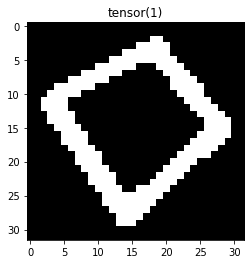

In [46]:
plt.title(labels[10000])
plt.imshow(imgs[10000].squeeze(), "gray")

In [26]:
from torchvision.io import read_image

In [32]:
img_path = data_DIR + '/train/3/3_1.png'
img = read_image(img_path)
img.size()

torch.Size([1, 32, 32])

In [53]:
imgs_norm[10000].min(), imgs_norm[10000].max()

(tensor(-0.5057), tensor(1.9775))

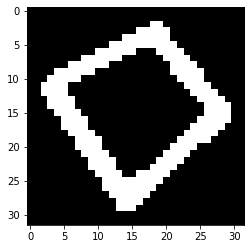

In [54]:
plt.imshow(imgs_norm[10000].squeeze() * std + mean, "gray")